In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [3]:
df = pd.read_csv("../ISLR/data/Wage.csv")
len(df.columns)

12

In [4]:
df.columns.values.tolist() 

['Unnamed: 0',
 'year',
 'age',
 'maritl',
 'race',
 'education',
 'region',
 'jobclass',
 'health',
 'health_ins',
 'logwage',
 'wage']

In [5]:
del df['logwage']
del df['Unnamed: 0']
df.columns.values.tolist() 

['year',
 'age',
 'maritl',
 'race',
 'education',
 'region',
 'jobclass',
 'health',
 'health_ins',
 'wage']

In [6]:
df.shape[0]

3000

In [7]:
df

,year,age,maritl,race,education,region,jobclass,health,health_ins,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,75.043154
...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,87.981033


In [8]:
df.describe()

,year,age,wage
count,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,111.703608
std,2.026167,11.542406,41.728595
min,2003.000000,18.000000,20.085537
25%,2004.000000,33.750000,85.383940
50%,2006.000000,42.000000,104.921507
75%,2008.000000,51.000000,128.680488
max,2009.000000,80.000000,318.342430


In [9]:
df['maritl'].value_counts()

2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: maritl, dtype: int64

In [10]:
df['race'].value_counts()

1. White    2480
2. Black     293
3. Asian     190
4. Other      37
Name: race, dtype: int64

In [11]:
df['education'].value_counts()

2. HS Grad            971
4. College Grad       685
3. Some College       650
5. Advanced Degree    426
1. < HS Grad          268
Name: education, dtype: int64

In [12]:
df['region'].value_counts()

2. Middle Atlantic    3000
Name: region, dtype: int64

In [13]:
df['jobclass'].value_counts()

1. Industrial     1544
2. Information    1456
Name: jobclass, dtype: int64

In [14]:
df['health'].value_counts()

2. >=Very Good    2142
1. <=Good          858
Name: health, dtype: int64

In [15]:
df['health_ins'].value_counts()

1. Yes    2083
2. No      917
Name: health_ins, dtype: int64

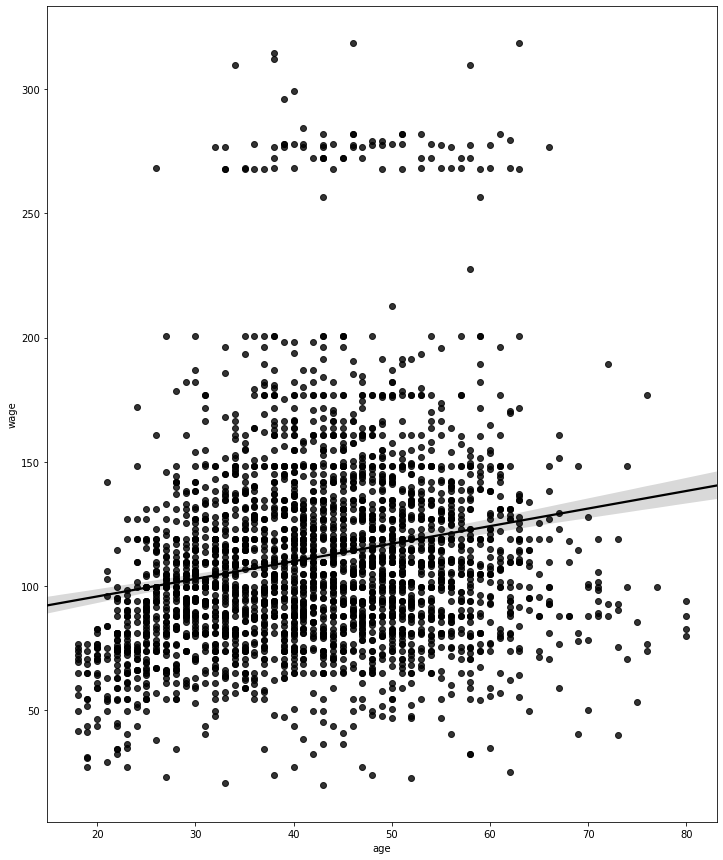

In [16]:
plt.figure(figsize=(12,15))
sns.regplot(x="age", y="wage", color="black", data=df);

In [82]:
stat, p = stats.shapiro(df['wage'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.880, p=0.000


In [100]:
stat, p = stats.shapiro(df['age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.991, p=0.000


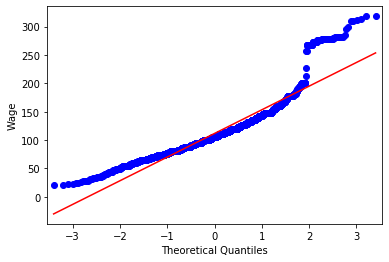

In [102]:
sm.qqplot(df['wage'], line='s')
plt.ylabel("Wage")
plt.show()

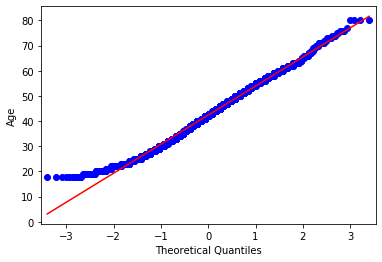

In [101]:
sm.qqplot(df['age'], line='s')
plt.ylabel("Age")
plt.show()

In [92]:
df['age'].corr(df['wage'])

0.19563720156358866

The Shapiro-Wilk test of normality shows us that wage and age are not normally distributed for alpha of 0.05 and therefore we can reject the null hypothesis. However Quantile-Quantile Plot shows both age and wage to be a close match for the 45 degree line drawn from a Gaussian distribution suggesting that the data (age and wage) was drawn from a gaussian distribution. 
This Pearson correlation test between age and wage shows us a weak positive correlation, meaning that the higher the age of the employee the more likely they are to recieve a higher wage according to the weak positive correlation. 

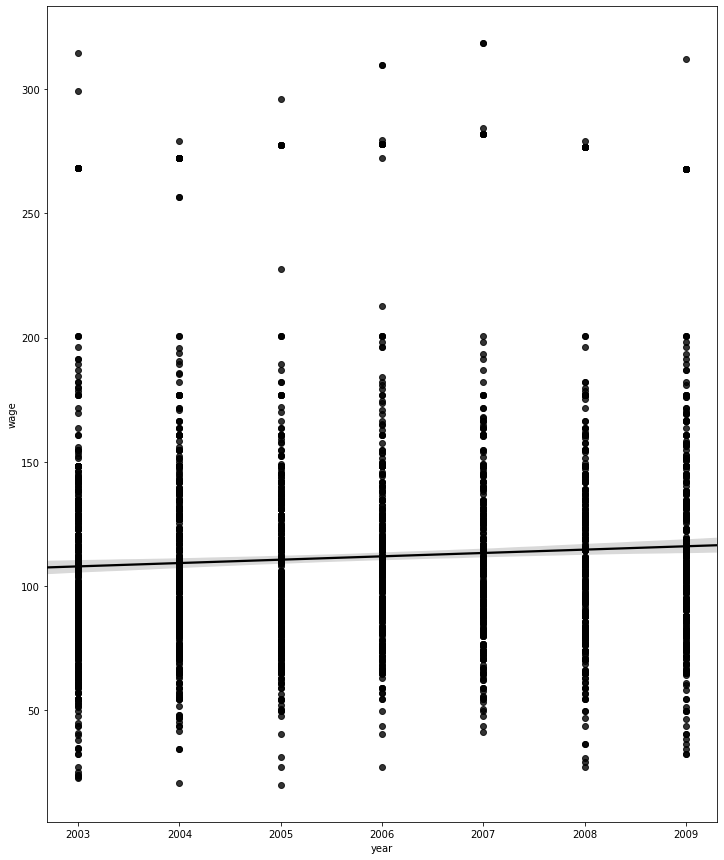

In [18]:
plt.figure(figsize=(12,15))
sns.regplot(x="year", y="wage", color="black", data=df);

In [86]:
stat, p = stats.shapiro(df['year'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.911, p=0.000


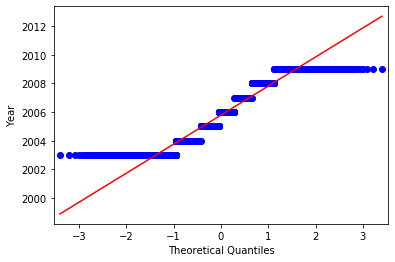

In [78]:
sm.qqplot(df['year'], line='s')
plt.ylabel("Year")
plt.show()

In [33]:
df['wage'].corr(df['year'])

0.06554427797296276

The Shapiro-Wilk test of normality shows us that "year" is not normally distributed for alpha of 0.05 and therefore we can reject the null hypothesis. The Quantile-Quantile Plot shows "year" to be a loose match for the 45 degree line drawn from a Gaussian distribution suggesting that "year" loosely follows a gaussian distribution. 
This Pearson correlation test between year and wage shows us a very weak positive correlation, meaning that the higher the year of an employee the more likely they are to recieve a higher wage according to the very weak positive correlation. 

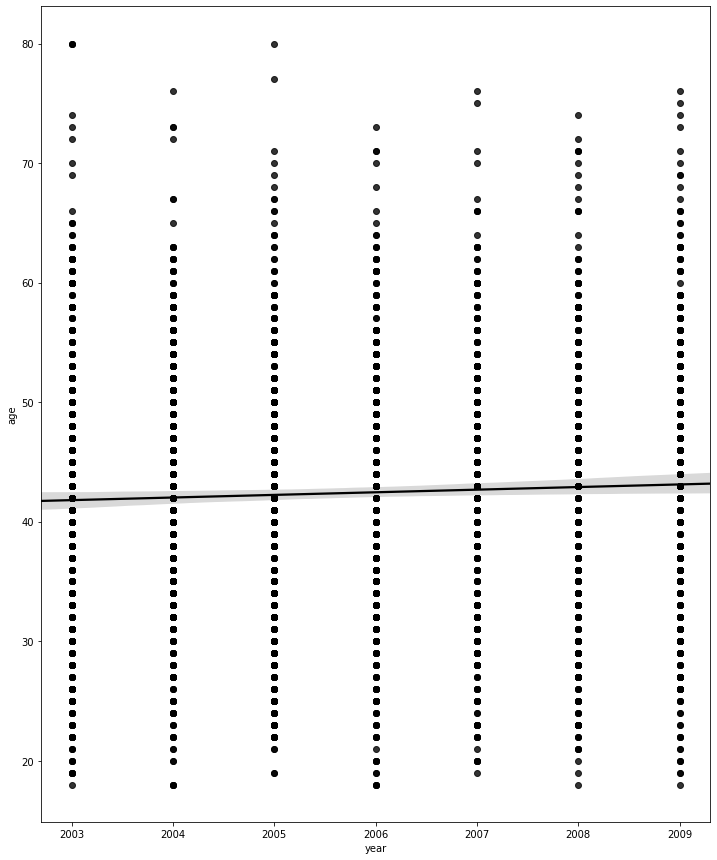

In [19]:
plt.figure(figsize=(12,15))
sns.regplot(x="year", y="age", color="black", data=df);

In [34]:
df['age'].corr(df['year'])

0.038424658405018026

This Pearson correlation test between year and age shows us a very weak positive correlation, meaning that the higher the year of an employee the more likely they are to have higher age according to the very weak positive correlation. 

In [105]:
df.education.unique()

array(['1. < HS Grad', '4. College Grad', '3. Some College', '2. HS Grad',
       '5. Advanced Degree'], dtype=object)

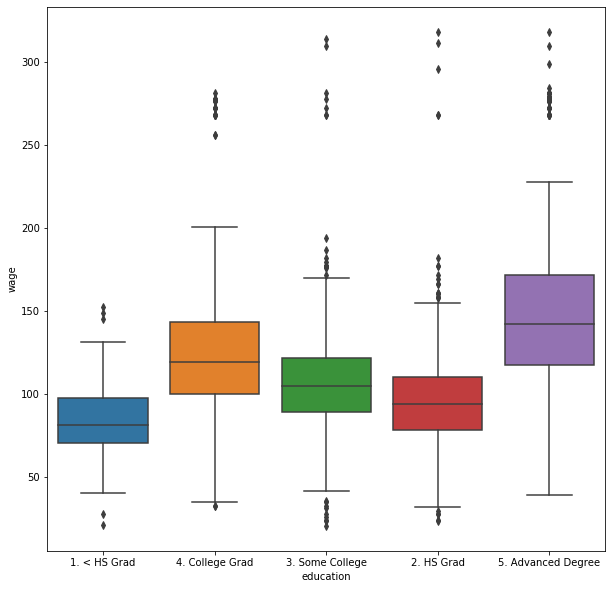

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(x="education", y="wage", data=df)

In [21]:
mod = ols('wage ~ education', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df           F         PR(>F)
education  1.226364e+06     4.0  229.805921  2.915932e-172
Residual   3.995721e+06  2995.0         NaN            NaN


The Box-Plot illustrates the differences between wage and education level found in the table. Advanced Degree employees have the highest median wage followed by Collage grad, some Collage education, HS Grad and lastly "< HS Grad". The range is also the highest for employees with advanced degree and employees with an Advance degree have a greater variation in wages as the box plot is tall compared to the other education categories. The upper whisker of "< HS Grad" category is low compared with the other education categories suggesting that on average employees in this category recieve a lower wage. 
The One Way ANOVA Test shows us that there is a significant difference in wage between different education levels for Alpha of 0.05. 

In [106]:
df.maritl.unique()

array(['1. Never Married', '2. Married', '4. Divorced', '3. Widowed',
       '5. Separated'], dtype=object)

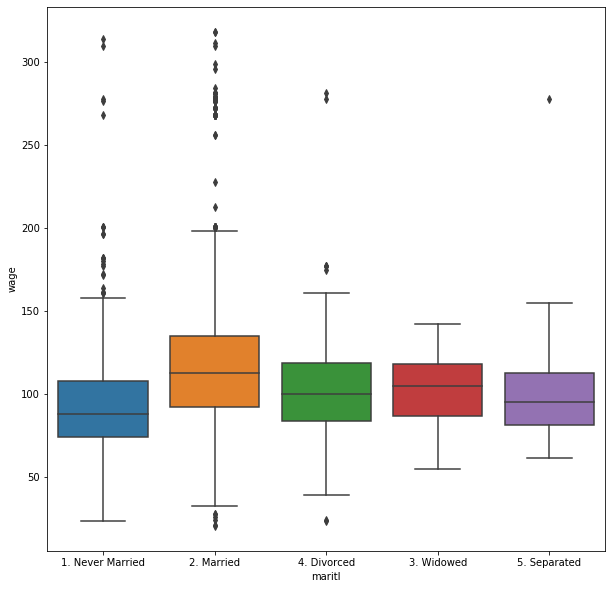

In [22]:
plt.figure(figsize=(10,10))
sns.boxplot(x="maritl", y="wage", data=df)

In [23]:
mod = ols('wage ~ maritl', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df          F        PR(>F)
maritl    3.631444e+05     4.0  55.959585  1.401201e-45
Residual  4.858941e+06  2995.0        NaN           NaN


The Box-Plot illustrates the differences between wage and marital status found in the table. Married employes have the highest median wage followed by widowed, divorced,seperated and finally never married. The range is also the highest for employees who are married. The Married category box plot is comparatively taller to the other categories of marrital status suggesting a greater variance of wages in this category. "Never Married" category employees have the lowest lower whisker suggesting that these bottom 25% of employees are payed less than other categories. However, there are some married employees who earn less than the 1st quartile group of "Never Married" employees. 
The One Way ANOVA Test shows us that there is a significant difference in wage between different marital statuses for Alpha of 0.05. 

In [107]:
df.race.unique()

array(['1. White', '3. Asian', '4. Other', '2. Black'], dtype=object)

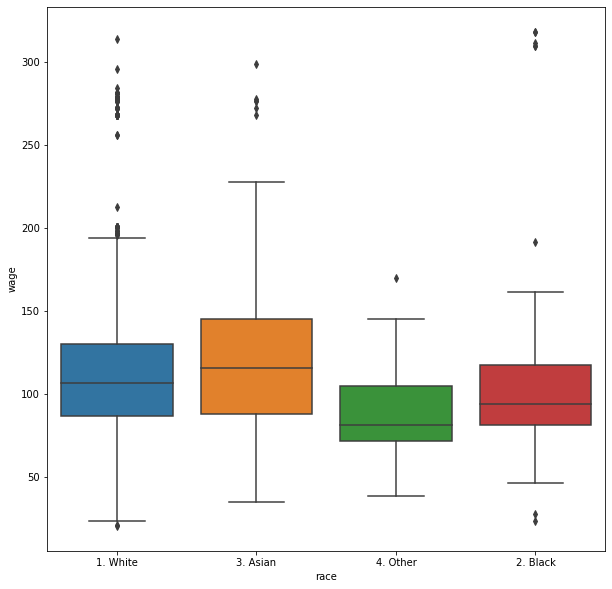

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(x="race", y="wage", data=df)

In [25]:
mod = ols('wage ~ race', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df          F        PR(>F)
race      6.321174e+04     3.0  12.236674  5.890230e-08
Residual  5.158874e+06  2996.0        NaN           NaN


The Box-Plot illustrates the differences between wage and race found in the table. Asian employees have the highest median wage followed by white, black and then other. Asian employees also have the highest range and the highest upper whisker. The box plot for asian employees is also comparatively tall suggesting greater variance in wage. Despite this a black employee has the highest wage in this table. 
The One Way ANOVA Test shows us that there is a significant difference in wage between employees of different races for Alpha of 0.05. 

In [108]:
df.jobclass.unique()

array(['1. Industrial', '2. Information'], dtype=object)

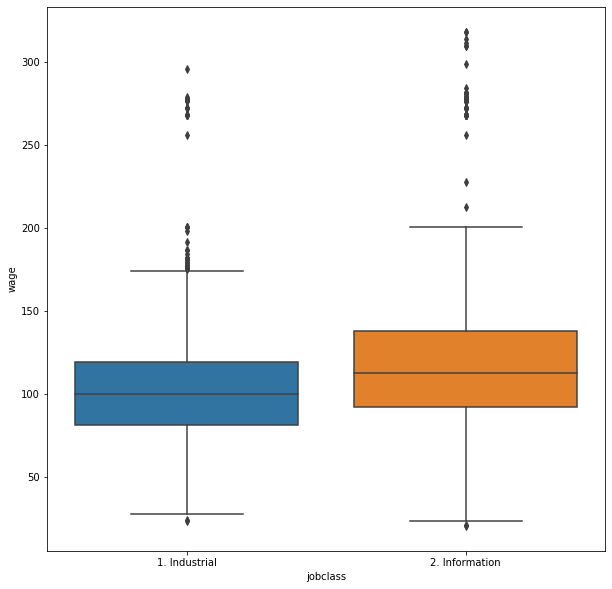

In [26]:
plt.figure(figsize=(10,10))
sns.boxplot(x="jobclass", y="wage", data=df)

In [27]:
mod = ols('wage ~ jobclass', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df           F        PR(>F)
jobclass  2.235384e+05     1.0  134.072585  2.308186e-30
Residual  4.998547e+06  2998.0         NaN           NaN


The Box-Plot illustrates the differences between jobclass and wage found in the table.  Information employees have a higher median wage compared to industrial employees, the upper whisker showing the quartile group 4 shows that the top 25% of information employee earners is also higher. However, the lower whisker of the information jobclass is lower than the industrial jobclass category. 
The One Way ANOVA Test shows us that there is a significant difference in wage between different job classes for Alpha of 0.05. 

In [109]:
df.health.unique()

array(['1. <=Good', '2. >=Very Good'], dtype=object)

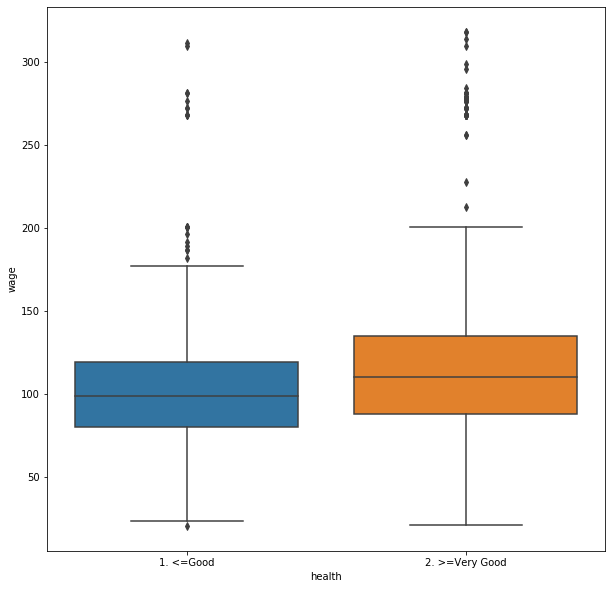

In [28]:
plt.figure(figsize=(10,10))
sns.boxplot(x="health", y="wage", data=df)

In [29]:
mod = ols('wage ~ health', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df          F        PR(>F)
health    1.211874e+05     1.0  71.226641  4.886404e-17
Residual  5.100898e+06  2998.0        NaN           NaN


The Box-Plot illustrates the differences between health and wage found in the table. Employees with ">=Very Good" health have a higher median wage with higher upper whisper compared to employees with "<=Good" health. The One Way ANOVA Test shows us that there is a significant difference in wage between employees in different health categories for Alpha of 0.05.

In [110]:
df.health_ins.unique()

array(['2. No', '1. Yes'], dtype=object)

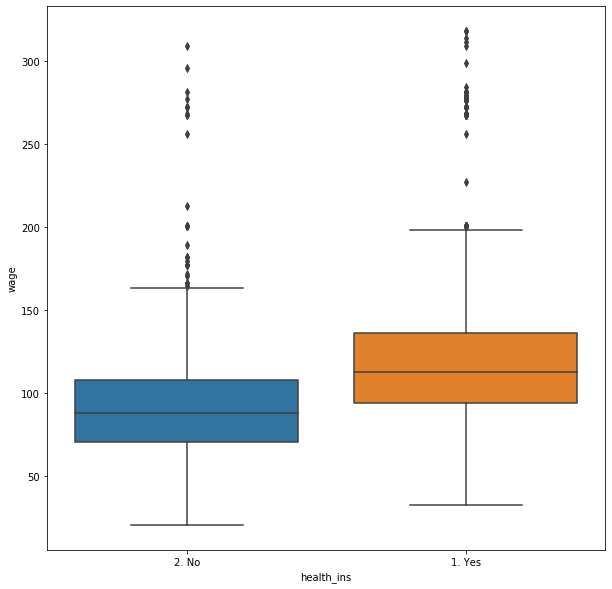

In [30]:
plt.figure(figsize=(10,10))
sns.boxplot(x="health_ins", y="wage", data=df)

In [31]:
mod = ols('wage ~ health_ins', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq      df           F        PR(>F)
health_ins  4.963846e+05     1.0  314.907964  4.465783e-67
Residual    4.725701e+06  2998.0         NaN           NaN


The Box-Plot illustrates the differences between health_ins (Assumed Health Insurance) and wage found in the table. Employees with health insurance have a higher median wage than employees without health insurance. The upper and lower whisker of the health insurance employees is also higher than that of employees without health insurance. The One Way ANOVA Test shows us that there is a significant difference in wage between employees with health insurance and employees without for Alpha of 0.05.

In [111]:
df.education.unique()

array(['1. < HS Grad', '4. College Grad', '3. Some College', '2. HS Grad',
       '5. Advanced Degree'], dtype=object)

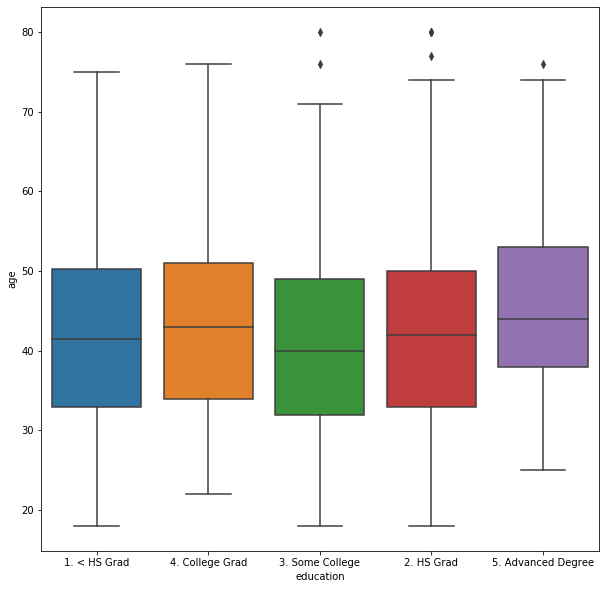

In [35]:
plt.figure(figsize=(10,10))
sns.boxplot(x="education", y="age", data=df)

In [36]:
mod = ols('age ~ education', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq      df         F        PR(>F)
education    4607.585231     4.0  8.735313  5.226851e-07
Residual   394940.569436  2995.0       NaN           NaN


The Box-Plot illustrates the differences between education and age found in the table. Employees with advanced degree and collage grad have the highest median age. The lowest whiskers are in the box plots of <HS Grad, Some collage education and HS grad, suggesting that these employees are on average younger than employees in other education categories.  The One Way ANOVA Test shows us that there is a significant difference in age between employees with different education levels for Alpha of 0.05.

In [112]:
df.maritl.unique()

array(['1. Never Married', '2. Married', '4. Divorced', '3. Widowed',
       '5. Separated'], dtype=object)

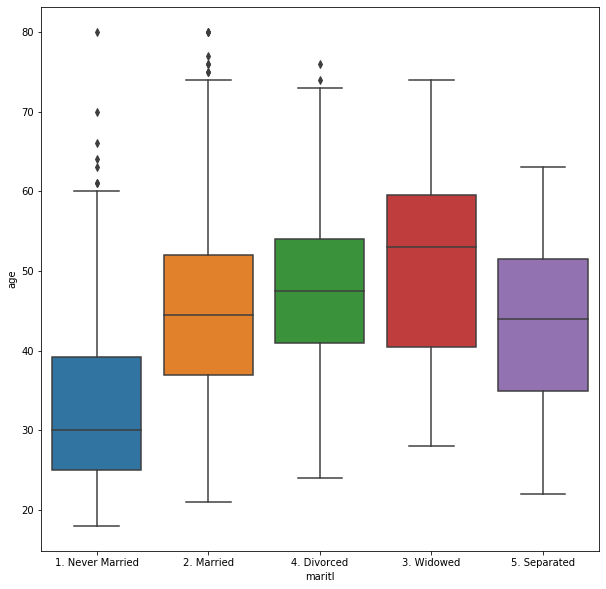

In [37]:
plt.figure(figsize=(10,10))
sns.boxplot(x="maritl", y="age", data=df)

In [38]:
mod = ols('age ~ maritl', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df           F         PR(>F)
maritl     81993.402546     4.0  193.329055  1.295968e-147
Residual  317554.752121  2995.0         NaN            NaN


The Box-Plot illustrates the differences between marital status and age found in the table. The highest median age is that of employees who are widowed with the highest lower whisker. The lowest median age is that of employees who have never been married.  The One Way ANOVA Test shows us that there is a significant difference in age between employees with different marital statuses for Alpha of 0.05.

In [113]:
df.race.unique()

array(['1. White', '3. Asian', '4. Other', '2. Black'], dtype=object)

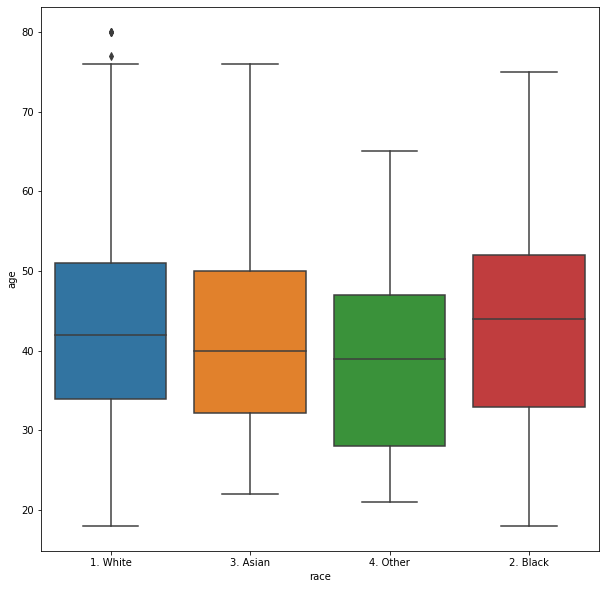

In [39]:
plt.figure(figsize=(10,10))
sns.boxplot(x="race", y="age", data=df)

In [40]:
mod = ols('age ~ race', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df         F    PR(>F)
race        1275.895381     3.0  3.199304  0.022453
Residual  398272.259285  2996.0       NaN       NaN


The Box-Plot illustrates the differences between race and age found in the table. The highest median age is that of employees who are black. The lowest median age is that of employees who are of race "Other", however the lowest lower whisker is that of white employees who also have the highest range of ages. The One Way ANOVA Test shows us that there is a significant difference in age between employees of different race for Alpha of 0.05.

In [114]:
df.jobclass.unique()

array(['1. Industrial', '2. Information'], dtype=object)

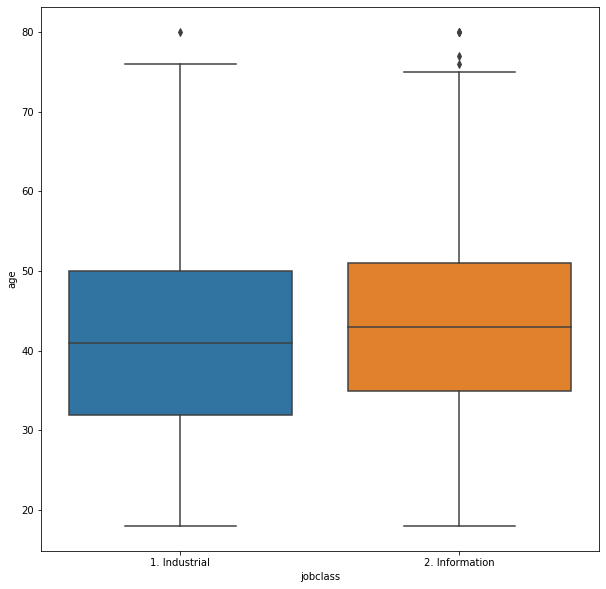

In [41]:
plt.figure(figsize=(10,10))
sns.boxplot(x="jobclass", y="age", data=df)

In [42]:
mod = ols('age ~ jobclass', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df          F        PR(>F)
jobclass    3286.202149     1.0  24.862427  6.507352e-07
Residual  396261.952517  2998.0        NaN           NaN


The Box-Plot illustrates the differences between jobclass and age found in the table. The highest median age is that of employees who are working in information. The box plot of industrial employees is taller than that of information employees suggesting a greater variation in age. The One Way ANOVA Test shows us that there is a significant difference in age between different jobclasses for Alpha of 0.05.

In [115]:
df.health.unique()

array(['1. <=Good', '2. >=Very Good'], dtype=object)

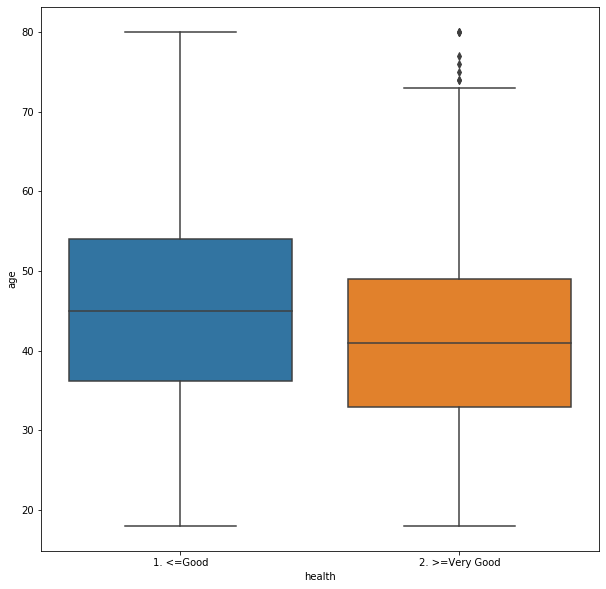

In [43]:
plt.figure(figsize=(10,10))
sns.boxplot(x="health", y="age", data=df)

In [44]:
mod = ols('age ~ health', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df          F        PR(>F)
health      7709.394825     1.0  58.985399  2.135751e-14
Residual  391838.759841  2998.0        NaN           NaN


The Box-Plot illustrates the differences between health and age found in the table. On average employees with >=Very Good health have lower age. The One Way ANOVA Test shows us that there is a significant difference in age between employees with different health categories for Alpha of 0.05.

In [116]:
df.health_ins.unique()

array(['2. No', '1. Yes'], dtype=object)

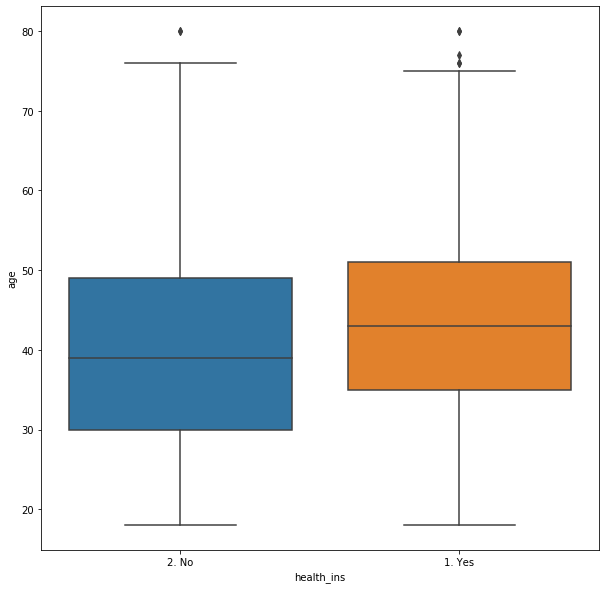

In [45]:
plt.figure(figsize=(10,10))
sns.boxplot(x="health_ins", y="age", data=df)

In [46]:
mod = ols('age ~ health_ins', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq      df          F        PR(>F)
health_ins    8123.418006     1.0  62.218876  4.268909e-15
Residual    391424.736661  2998.0        NaN           NaN


The Box-Plot illustrates the differences between health_ins and age found in the table. The box plot shows us that employees with health insurance have a higher median age than employees without health insurance. The One Way ANOVA Test shows us that there is a significant difference in age between employees who have health insurance and employees who do not have health insurance for Alpha of 0.05.

In [117]:
df.education.unique()

array(['1. < HS Grad', '4. College Grad', '3. Some College', '2. HS Grad',
       '5. Advanced Degree'], dtype=object)

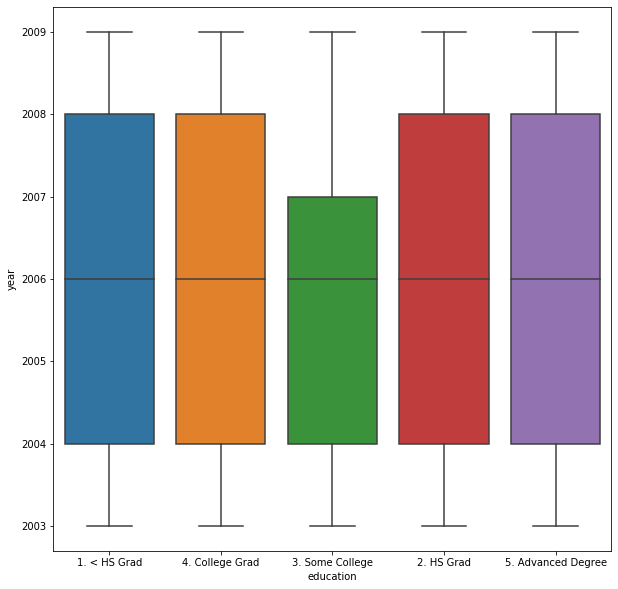

In [47]:
plt.figure(figsize=(10,10))
sns.boxplot(x="education", y="year", data=df)

In [48]:
mod = ols('year ~ education', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df         F    PR(>F)
education     12.482946     4.0  0.759919  0.551295
Residual   12299.474054  2995.0       NaN       NaN


The Box-Plot illustrates the differences between education and year found in the table. The box plots have identical medians with the only difference being the 3rd quartile group of the category of employees with "Some collage education". The One Way ANOVA Test shows us that there is no significant difference in year between different education categories for Alpha of 0.05.

In [118]:
df.maritl.unique()

array(['1. Never Married', '2. Married', '4. Divorced', '3. Widowed',
       '5. Separated'], dtype=object)

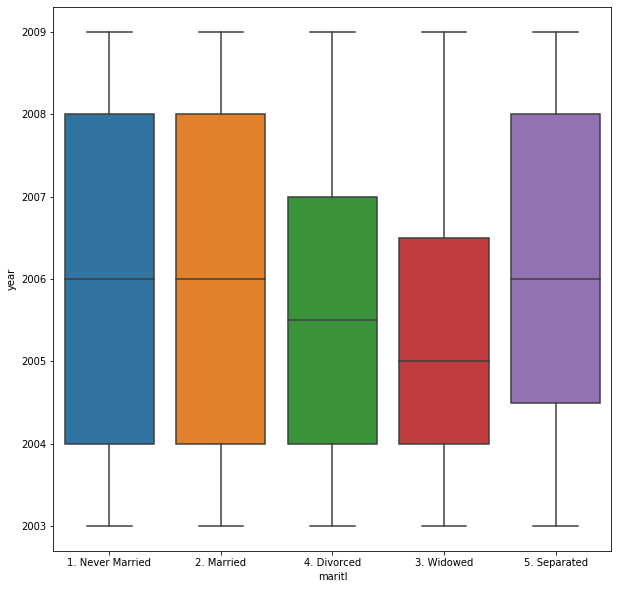

In [49]:
plt.figure(figsize=(10,10))
sns.boxplot(x="maritl", y="year", data=df)

In [50]:
mod = ols('year ~ maritl', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df         F    PR(>F)
maritl       13.480656     4.0  0.820723  0.511759
Residual  12298.476344  2995.0       NaN       NaN


The Box-Plot illustrates the differences marital status and year found in the table. The box plot shows that widowed employees have the lowest median year followed by divorced and the remaining marital statuses have median year of 2006. Widowed box plot is comparetively shorter than the others suggesting a smaller variance in year between employees of this category.The One Way ANOVA Test shows us that there is no significant difference in year between different employees with different martial statuses for Alpha of 0.05.

In [119]:
df.race.unique()

array(['1. White', '3. Asian', '4. Other', '2. Black'], dtype=object)

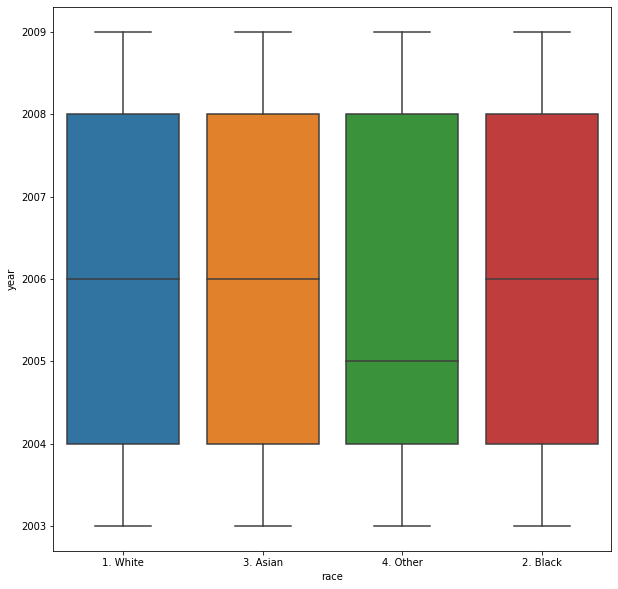

In [51]:
plt.figure(figsize=(10,10))
sns.boxplot(x="race", y="year", data=df)

In [52]:
mod = ols('year ~ race', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df         F    PR(>F)
race         18.600831     3.0  1.511063  0.209584
Residual  12293.356169  2996.0       NaN       NaN


The Box-Plot illustrates the differences races and year found in the table. The box plot shows that employees of race "Other" have the lowest median year while the other categories have a equal median of 2006. The One Way ANOVA Test shows us that there is no significant difference in year between employees of different races for Alpha of 0.05.

In [120]:
df.jobclass.unique()

array(['1. Industrial', '2. Information'], dtype=object)

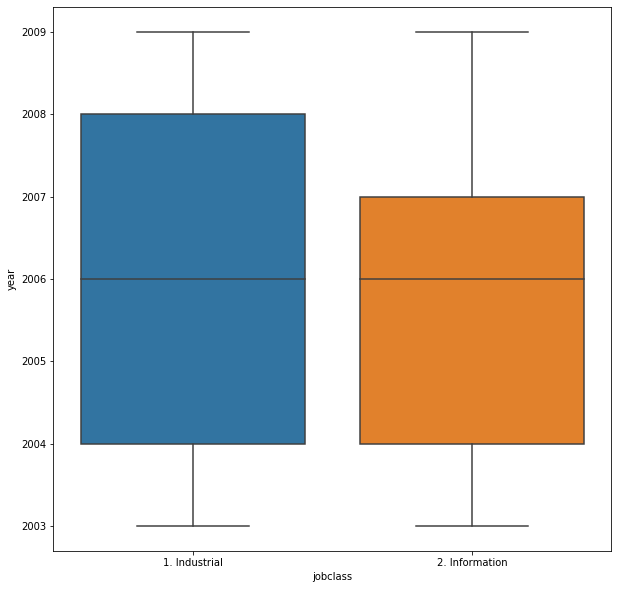

In [53]:
plt.figure(figsize=(10,10))
sns.boxplot(x="jobclass", y="year", data=df)

In [54]:
mod = ols('year ~ jobclass', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df         F   PR(>F)
jobclass      0.466455     1.0  0.113588  0.73612
Residual  12311.490545  2998.0       NaN      NaN


The Box-Plot illustrates the differences jobclasses and year found in the table. The box plot shows that the median years of industrial and information employees are identical, however, the 3rd quartile group of information employees is smaller suggesting a lower variance in years. The One Way ANOVA Test shows us that there is no significant difference in years between job classes for Alpha of 0.05.

In [121]:
df.health.unique()

array(['1. <=Good', '2. >=Very Good'], dtype=object)

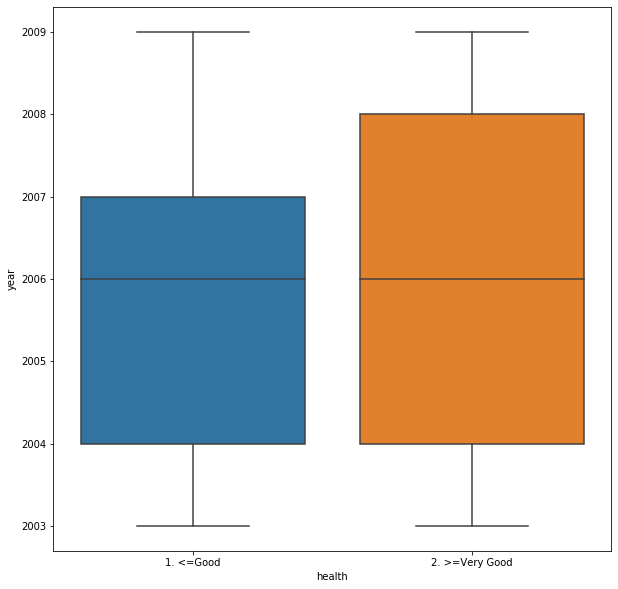

In [55]:
plt.figure(figsize=(10,10))
sns.boxplot(x="health", y="year", data=df)

In [56]:
mod = ols('year ~ health', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df         F    PR(>F)
health        0.046234     1.0  0.011258  0.915506
Residual  12311.910766  2998.0       NaN       NaN


The Box-Plot illustrates the differences health and year found in the table. The box plot shows that the median years of employees with <=Good health and >=Very Good health is identical, however, the 3rd quartile group of employees with <=Good health is smaller suggesting a lower variance in years. The One Way ANOVA Test shows us that there is no significant difference in years between employees of different health categories for Alpha of 0.05.

In [122]:
df.health_ins.unique()

array(['2. No', '1. Yes'], dtype=object)

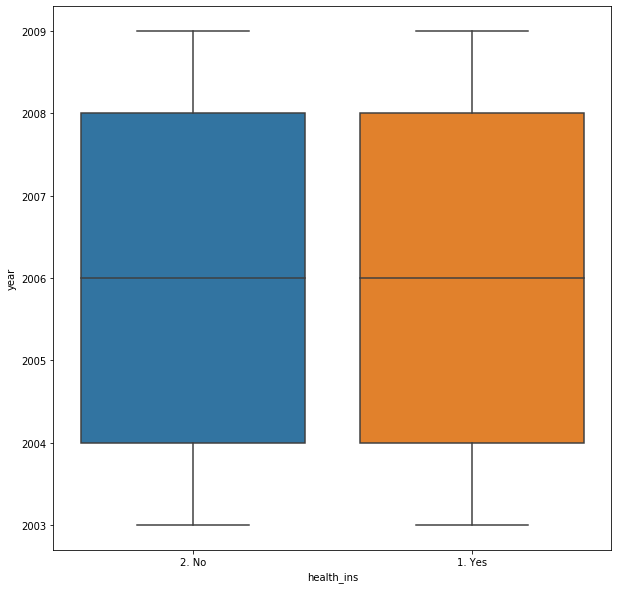

In [57]:
plt.figure(figsize=(10,10))
sns.boxplot(x="health_ins", y="year", data=df)

In [58]:
mod = ols('year ~ health_ins', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq      df         F    PR(>F)
health_ins      0.805961     1.0  0.196267  0.657783
Residual    12311.151039  2998.0       NaN       NaN


The Box-Plot illustrates the differences health insurance and year found in the table. The box plot shows that the two plots are identical. The One Way ANOVA Test shows us that there is no significant difference in years between employees who have health insurance and employees who do not for Alpha of 0.05.

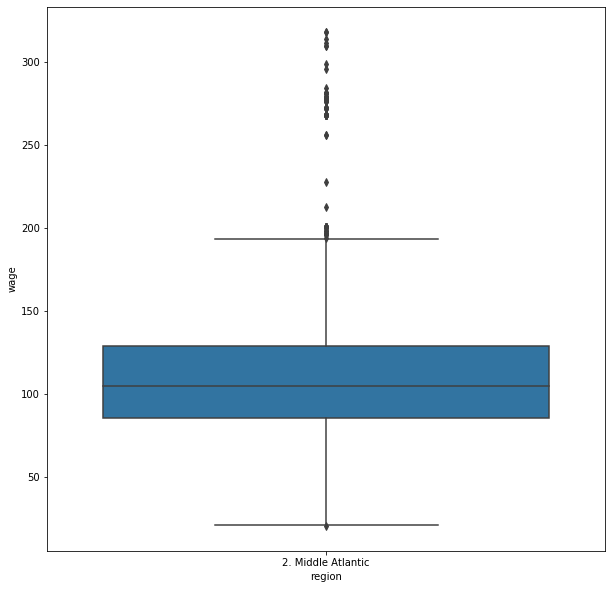

In [123]:
plt.figure(figsize=(10,10))
sns.boxplot(x="region", y="wage", data=df)

The Box-Plot shows that the median wage of all employees is just above 100 with the upper whisker below 200,there are however a few employees above the upper whisker. The One Way ANOVA Test cannot be performed due to all employees being in a single category. 

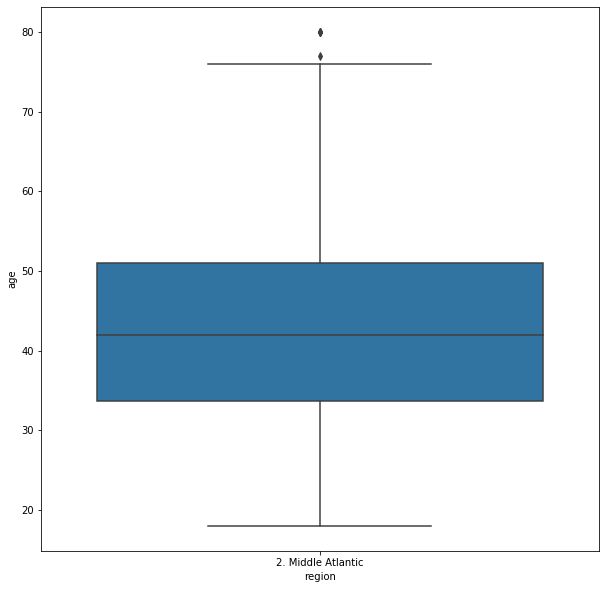

In [125]:
plt.figure(figsize=(10,10))
sns.boxplot(x="region", y="age", data=df)

The Box-Plot shows that the median age of the employees is just above 40 years old with the upper whisker being just below 80 and lower whisker just below 20. 50% of all employees are in the ages between 50 and mid 30s. The One Way ANOVA Test cannot be performed due to all employees being in a single category. 

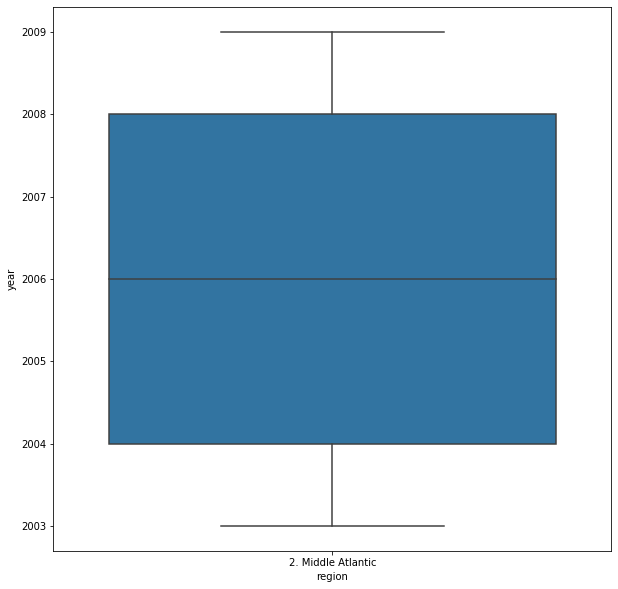

In [126]:
plt.figure(figsize=(10,10))
sns.boxplot(x="region", y="year", data=df)

The Box-Plot shows that the median year of the employees is 2006 with the upper whisker being 2009 and lower whisker being 2003. 50% of employees are in the years between 2004 and 2008. The One Way ANOVA Test cannot be performed due to all employees being in a single category. 